In [1]:
import pandas as pd


country_vaccinations_path = 'data_output/selected_countries.csv'

data  = pd.read_csv(country_vaccinations_path)
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2546 entries, 0 to 2545
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date_reported       2546 non-null   object 
 1   Country             2546 non-null   object 
 2   New_deaths          2546 non-null   float64
 3   New_cases           2546 non-null   float64
 4   daily_vaccinations  2546 non-null   float64
 5   Year                2546 non-null   int64  
 6   Month               2546 non-null   int64  
 7   Day                 2546 non-null   int64  
 8   Day_of_Week         2546 non-null   int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 179.1+ KB


(  Date_reported        Country  New_deaths  New_cases  daily_vaccinations  \
 0    2020-12-13  United States      3188.0   245839.0                 0.0   
 1    2020-12-14  United States      2440.0   217153.0              4579.0   
 2    2020-12-15  United States      2037.0   181275.0             27175.0   
 3    2020-12-16  United States      1955.0   198204.0             71420.0   
 4    2020-12-17  United States      2758.0   198650.0            121718.0   
 
    Year  Month  Day  Day_of_Week  
 0  2020     12   13            6  
 1  2020     12   14            0  
 2  2020     12   15            1  
 3  2020     12   16            2  
 4  2020     12   17            3  ,
 None)

In [3]:
data[data['Country'] == 'United States'].to_csv('data_output/usa_covid_analysis.csv', index=False)


In [28]:

us_path = 'data_output/usa_covid_analysis.csv'

usaDF  = pd.read_csv(country_vaccinations_path)
data

,Country,New_deaths,New_cases,daily_vaccinations,Year,Month,Day,Day_of_Week
Date_reported,,,,,,,,
2020-12-13,United States,3188.0,245839.0,0.0,2020,12,13,6
2020-12-14,United States,2440.0,217153.0,4579.0,2020,12,14,0
2020-12-15,United States,2037.0,181275.0,27175.0,2020,12,15,1
2020-12-16,United States,1955.0,198204.0,71420.0,2020,12,16,2
2020-12-17,United States,2758.0,198650.0,121718.0,2020,12,17,3
...,...,...,...,...,...,...,...,...
2022-03-28,Australia,31.0,0.0,68403.0,2022,3,28,0
2022-03-29,Australia,28.0,0.0,65688.0,2022,3,29,1
2022-03-29,South Africa,4.0,581.0,66081.0,2022,3,29,1


In [32]:
usaDF['Date_reported'] = pd.to_datetime(usaDF['Date_reported'])
usaDF.set_index('Date_reported', inplace=True)

<Figure size 0x1000 with 0 Axes>

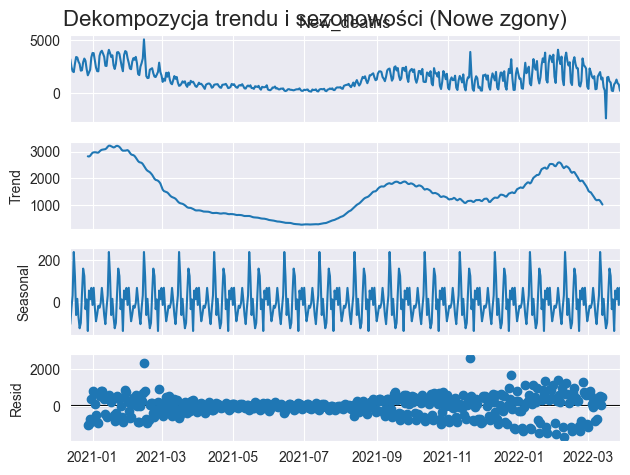

<Figure size 0x1000 with 0 Axes>

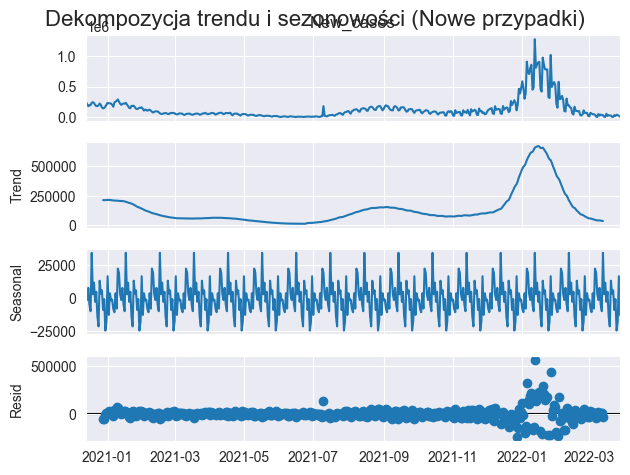

<Figure size 0x1000 with 0 Axes>

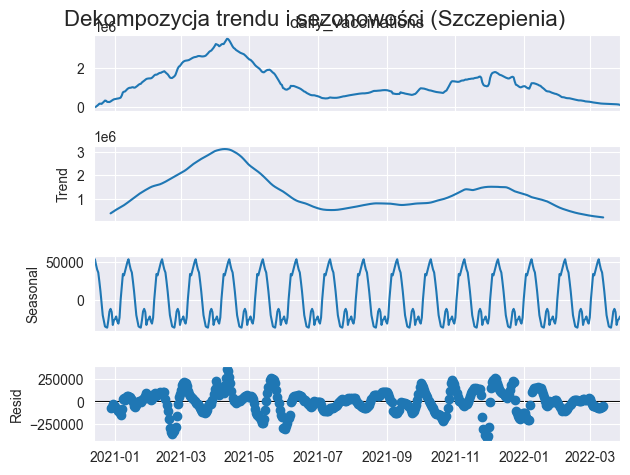

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

decompose_result = seasonal_decompose(usaDF['New_deaths'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe zgony)', fontsize=16)
plt.show()
print('=========================')

decompose_new_cases = seasonal_decompose(usaDF['New_cases'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_new_cases.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Nowe przypadki)', fontsize=16)
plt.show()

print('=========================')
decompose_result_daily_vaccinations = seasonal_decompose(usaDF['daily_vaccinations'], model='additive', period=30)

plt.figure(figsize=(0, 10))
decompose_result_daily_vaccinations.plot()
plt.suptitle('Dekompozycja trendu i sezonowości (Szczepienia)', fontsize=16)
plt.show()
print('=========================')



Na podstawie tych wykresów wyraźnie widać, że:

Nowe zgony:

Po wprowadzeniu szczepień liczba zgonów zaczęła spadać pomimo występowania kolejnych fal zachorowań.
Trend wskazuje na wyraźną redukcję umieralności w miarę upowszechniania szczepień.
Nowe przypadki:

Fale zachorowań powtarzają się z sezonowością, ale w szczytach fal widać większą liczbę zachorowań w porównaniu z wcześniejszymi latami.
Szczepienia:

Po gwałtownym wzroście liczby szczepień osiągnięto ich szczyt, a następnie nastąpił stopniowy spadek.
Wniosek: Wzrost liczby szczepień mógł przyczynić się do zmniejszenia umieralności podczas kolejnych fal pandemii, nawet gdy liczba nowych przypadków wzrosła. To wskazuje na skuteczność szczepień w ograniczaniu ciężkości przebiegu choroby.

In [34]:
from scipy.stats import ttest_ind

usaDF.index = pd.to_datetime(usaDF.index)

threshold_date = '2021-01-01'  # Example threshold date for vaccination impact
before_vaccination = usaDF[usaDF.index < threshold_date]['New_deaths']
after_vaccination = usaDF[usaDF.index >= threshold_date]['New_deaths']

t_stat, p_value = ttest_ind(before_vaccination.dropna(), after_vaccination.dropna())

t_stat, p_value

(5.160440873943747, 3.6442768732822936e-07)

In [35]:
before_vaccination

Date_reported
2020-12-13    3188.0
2020-12-14    2440.0
2020-12-15    2037.0
2020-12-16    1955.0
2020-12-17    2758.0
2020-12-18    3389.0
2020-12-19    3338.0
2020-12-20    2949.0
2020-12-21    2727.0
2020-12-22    2090.0
2020-12-23    2129.0
2020-12-24    2891.0
2020-12-25    3238.0
2020-12-26    3021.0
2020-12-27    2237.0
2020-12-28    1650.0
2020-12-29    1903.0
2020-12-30    2180.0
2020-12-31    3351.0
Name: New_deaths, dtype: float64

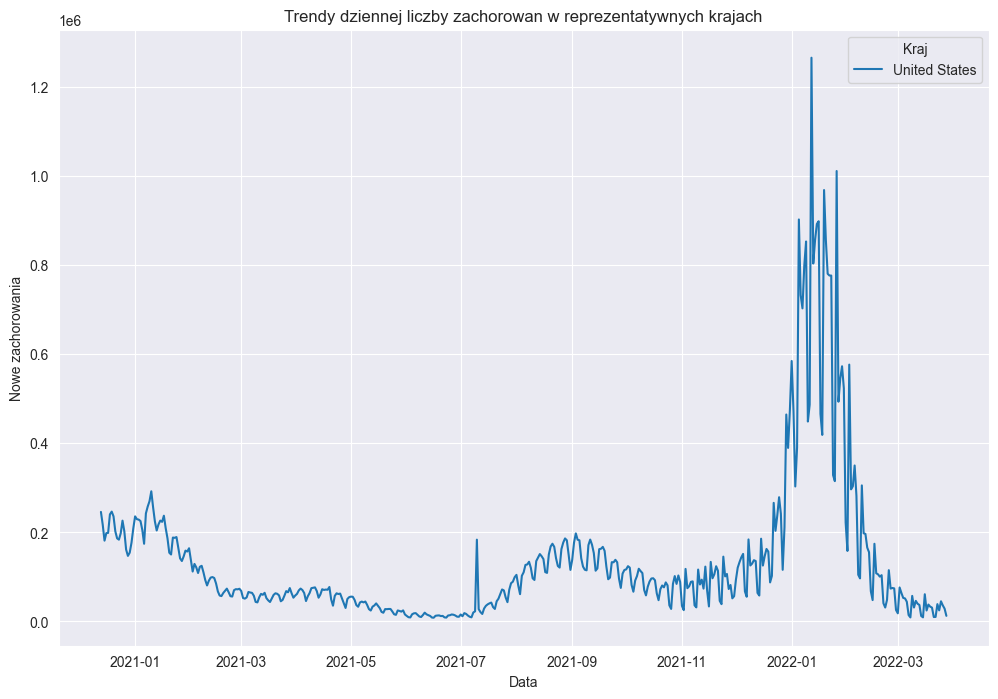

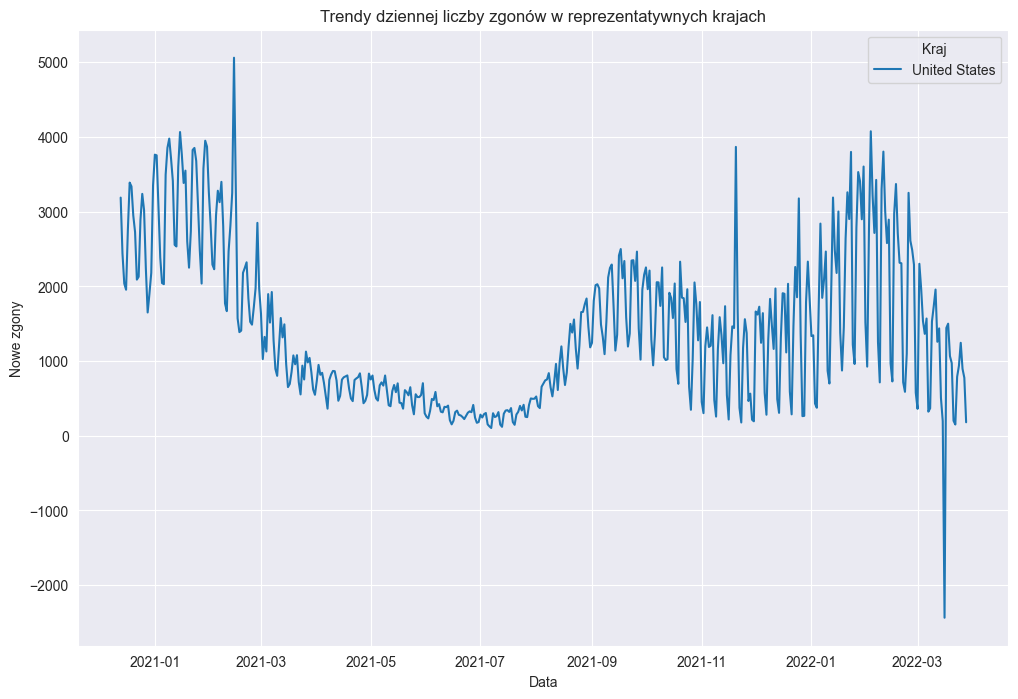

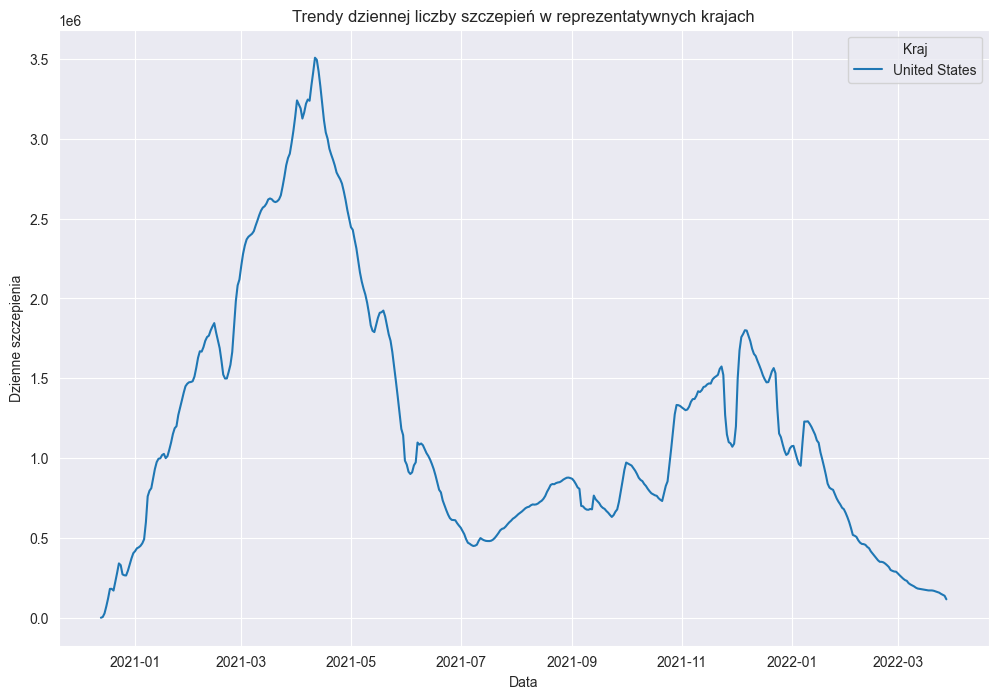

,Country,New_deaths,New_cases,daily_vaccinations,Year,Month,Day,Day_of_Week
Date_reported,,,,,,,,
2020-12-13,United States,3188.0,245839.0,0.0,2020,12,13,6
2020-12-14,United States,2440.0,217153.0,4579.0,2020,12,14,0
2020-12-15,United States,2037.0,181275.0,27175.0,2020,12,15,1
2020-12-16,United States,1955.0,198204.0,71420.0,2020,12,16,2
2020-12-17,United States,2758.0,198650.0,121718.0,2020,12,17,3
...,...,...,...,...,...,...,...,...
2022-03-24,United States,937.0,24771.0,156889.0,2022,3,24,3
2022-03-25,United States,1244.0,45160.0,149541.0,2022,3,25,4
2022-03-26,United States,895.0,36077.0,143396.0,2022,3,26,5


In [40]:
from matplotlib import pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF,
    x='Date_reported',
    y='New_cases',
    hue='Country'
)
plt.title('Trendy dziennej liczby zachorowan w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Nowe zachorowania')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF,
    x='Date_reported',
    y='New_deaths',
    hue='Country'
)
plt.title('Trendy dziennej liczby zgonów w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Nowe zgony')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=usaDF,
    x='Date_reported',
    y='daily_vaccinations',
    hue='Country'
)
plt.title('Trendy dziennej liczby szczepień w reprezentatywnych krajach')
plt.xlabel('Data')
plt.ylabel('Dzienne szczepienia')
plt.legend(title='Kraj')
plt.grid(True)
plt.show()
usaDF

,Country,New_deaths,New_cases,daily_vaccinations,Year,Month,Day,Day_of_Week
Date_reported,,,,,,,,
2020-12-13,United States,3188.0,245839.0,0.0,2020,12,13,6
2020-12-14,United States,2440.0,217153.0,4579.0,2020,12,14,0
2020-12-15,United States,2037.0,181275.0,27175.0,2020,12,15,1
2020-12-16,United States,1955.0,198204.0,71420.0,2020,12,16,2
2020-12-17,United States,2758.0,198650.0,121718.0,2020,12,17,3
...,...,...,...,...,...,...,...,...
2022-03-24,United States,937.0,24771.0,156889.0,2022,3,24,3
2022-03-25,United States,1244.0,45160.0,149541.0,2022,3,25,4
2022-03-26,United States,895.0,36077.0,143396.0,2022,3,26,5
